In [1]:
%matplotlib inline
import matplotlib.pyplot as p
import numpy as np

import astropy.constants as cs
import os
import pyfits

import pipeline as pipe
import reduction as r
import data
import systematics
from data import view_frame_image as view

looking for spidermanrc file at /home/jacob/.spidermanrc
no spidermanrc file detected


# Setup for light-curve reduction

### 1) Download data
https://archive.stsci.edu/hst/search.php

\_ima files for all data

\_drz and \_flt files for the direct images (taken with Filters instead of Grism)

In [6]:
# data_dir: directory where the _ima files are stored
data_dir = '/home/jacob/hstscan/data/HD209458/GO12181/'

### 2) Produce visit information lists

In [7]:
# prop_str: first 4 characters of the files' names (proposal ID string)
data.make_input_image_lists(data_dir=data_dir, prop_str='ibh7')

['26']
Starting visit 26
Starting file 1 for visit 26
Completed file 1 for visit 26
Starting file 2 for visit 26
Completed file 2 for visit 26
Starting file 3 for visit 26
Completed file 3 for visit 26
Starting file 4 for visit 26
Completed file 4 for visit 26
Starting file 5 for visit 26
Completed file 5 for visit 26
Starting file 6 for visit 26
Completed file 6 for visit 26
Starting file 7 for visit 26
Completed file 7 for visit 26
Starting file 8 for visit 26
Completed file 8 for visit 26
Starting file 9 for visit 26
Completed file 9 for visit 26
Starting file 10 for visit 26
Completed file 10 for visit 26
Starting file 11 for visit 26
Completed file 11 for visit 26
Starting file 12 for visit 26
Completed file 12 for visit 26
Starting file 13 for visit 26
Completed file 13 for visit 26
Starting file 14 for visit 26
Completed file 14 for visit 26
Starting file 15 for visit 26
Completed file 15 for visit 26
Starting file 16 for visit 26
Completed file 16 for visit 26
Starting file 17 

At this point it makes sense to re-name the visit files to more appropriate names, e.g. visit_26.lis -> transit.lis

### 3) Fit direct image positions to produce position catalogues

Writing to: /home/jacob/hstscan/data/HD209458/GO12181/ibh726mdq_flt_1.cat
Shape (242, 271)


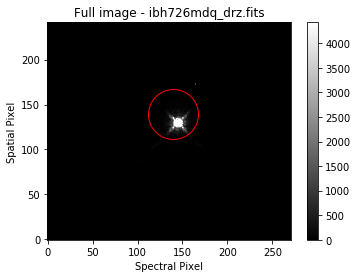

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  5.125e+05        0      inf     1693     True     None     None
x_mean        25.03        0       60  0.00366     True     None     None
x_stddev      1.107        0      inf 0.003654     True     None     None
y_mean        9.206        0       60 0.003578     True     None     None
y_stddev      1.082        0      inf 0.003575     True     None     None


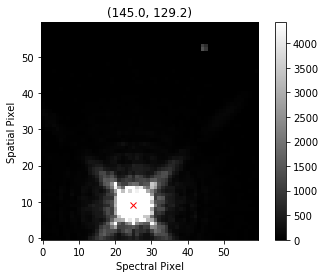

In [8]:
# gridsize: coarseness of initial search for source
# nstars: number of stars for which positions should be measured (in order of brightness)
# use_ima: use _ima files instead of _flt in case of problems
pipe.create_orbit_cats_gauss(data_dir=data_dir, gridsize=20, use_ima=False, nstars=1)

Now have everything you need to reduce an exposure and produce spectra

# Config File Parameters

## Red

### Parameters to define yourself
 - source_dir
 - save_dir
 - scan_rate
 - bg_x,y,w,h
 - flat_file_g141
 - conf_file_g141
 
### Leave
These you are unlikely to want to change, although their effects are important
 - scanned = True
 - units = True
 - read_noise = 20
 - skip_start = 1
 - skip_end = 0
 - bg = True
 - bg_area = True
 - cr_local = True
 - dispersion = True
 - flat_field = True
 - ff_min = 0.5
 - contam_thresh = 0.01
 - nysig = 5
 
### Cosmic Rays
You may want to experiment with cosmic ray removal parameters, can turn off cosmic ray removal for a first run
 - cr_tol = 15 (try to lower without removing spectrum)
 - cr_x,y (consider tweaking if CR removal too agressive/weak)
 - cr_thresh = 50 (can raise)

### Data quality flags
Lookup flags in data handbook. 4: Bad detector pixel, 32: IR unstable pixel.

Leave as is unless there are problems.
 - dq_flags = [4,32]
 - dq_replace = None
 - dq_mean_width = 1
 
### Wavelength Solution
For now, disable the Tsiaras wavelength solution and use the simple interpolation.
May want to tweak drift_width and rowtol, parameters for smoothing the drift within an exposure.

E.g. define
 - exp_shift = False
 - tsiaras = False
 - exp_drift = True
 - drift_width = 4
 - drift_rowtol = 1.1
 - ref_exp = None


### Plots
Leave on while still tweaking
 - debug = True
 - pdf = True
 - logger = True
 - bg_plot = True
 - cr_plot = True
 
### Tweak to position extraction box
Depending on the observations, need to account/remove different effects to center the spectrum in the extraction box. Have not figured out a universal solution.

 - remove_scan
 - postarg_yguess
 - default_scan
 
 
### Ignore
These are either no longer used, in development, or were for specific data sets/modes.
 - system
 - nlincorr
 - psf_h (these are for bg removal with masks)
 - mask_h
 - psf_w
 - n_masks
 - neg_masks
 - cr_replace
 - cr_master
 - cr_mname
 - ref_exp
 - ref_wv0
 - ref_wv1
 - pre_shift_ff
 - peak
 - x_shift_ext
 - grid_y
 - grid_lam
 - two_scans 
 - interp_kind
 - object_ind

## Ext

### Parameters to define yourself
 - save_dir
 - box_h (ensure large enough to capture whole spectrum)
 
### Plots
- debug = True
- logger = True
- pdf = True
- oe_debug = False (its very slow, turn on only if focusing on optimal extraction)

### Leave
 - save_extension = '_spec.txt'
 - calc_var = True
 - extraction_box = True
 - shift_spectra = True
 - shift_wv0 = 1.14
 - shift_wv1 = 1.6
 - peak = False
 - opt_ext = True
 
### Optimal Extraction

#### Tweak
- fit_tol
- order
- step
- k_col/row

#### Leave
- s = 0
- v_0 = 400
- q = 1
- s_clip = None
- s_cosmic = None
- func_type = 'spline'
- method = 'lsq'
- remove_bg = True
- object_ind = 0
 
### Ignore
- save_sub
- mask_neg
- ignore_blobx
- blob_thresh
- skip_fit
- top_half

# Run data reduction on one exposure

########################################
###########Starting Reduction###########
########################################
Data reduction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see pipeline conf file: /home/jacob/hstscan/data/HD209458/GO12181/red.conf


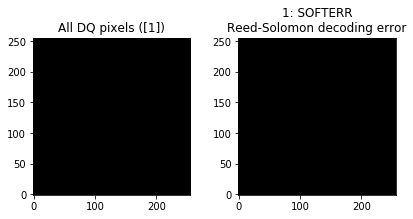

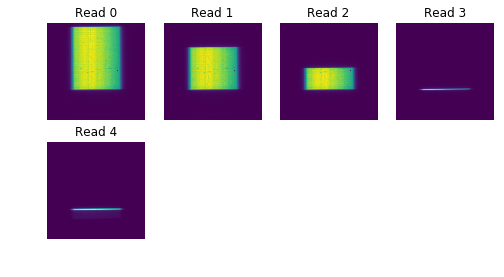

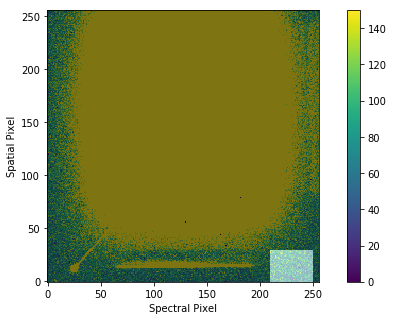

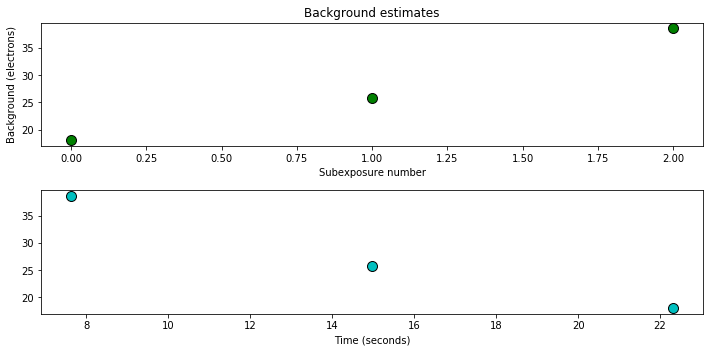

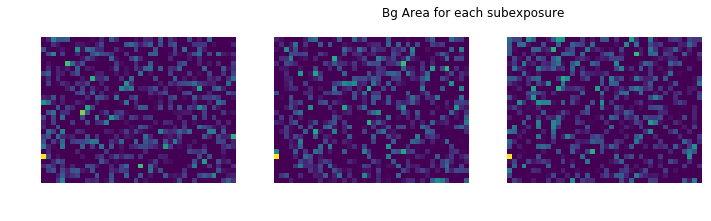

Forward scan
Catalogue used: /home/jacob/hstscan/data/HD209458/GO12181/ibh726mdq_flt_1.cat
Direct Image name: ibh726mdq
Catalogue file: ibh726mdq_ima.fits
Direct image location of (145.027022115,129.205914903)
External xshift of direct image applied, of -110 pix
applying postarg offset to yguess, 147.72 pix
(256, 256)
(136, 200)
(256, 256)
(189, 200)
(256, 256)
(198, 200)
applying postarg offset to yguess, 147.72 pix
(256, 256)
(136, 200)
(136, 200) (136, 200) 136 200
(256, 256)
(189, 200)
(189, 200) (189, 200) 189 200
(256, 256)
(198, 200)
(198, 200) (198, 200) 198 200


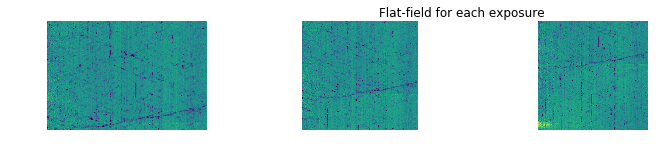

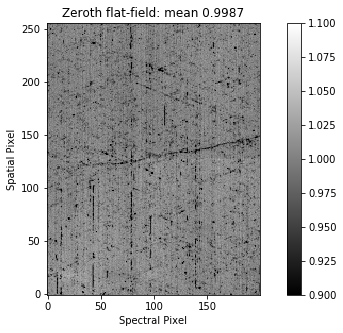

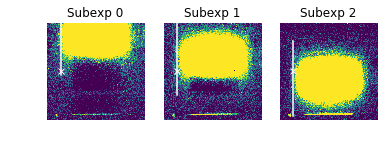

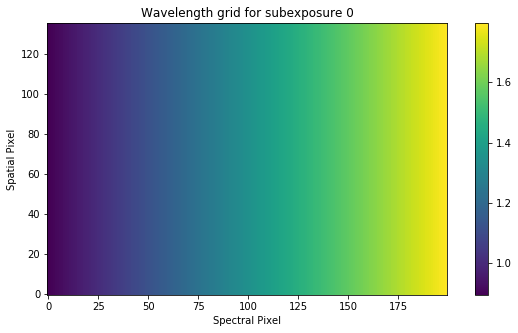

Removed 18 CR pixels from subexposure 1
Removed 27 CR pixels from subexposure 2
Removed 38 CR pixels from subexposure 3


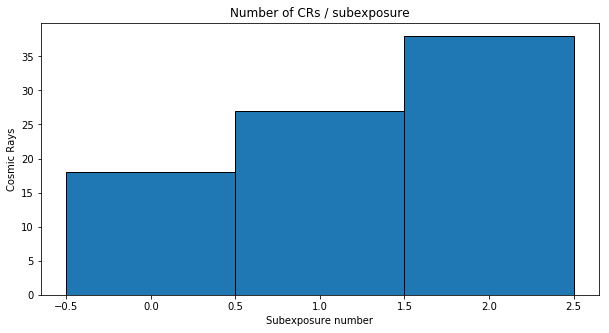

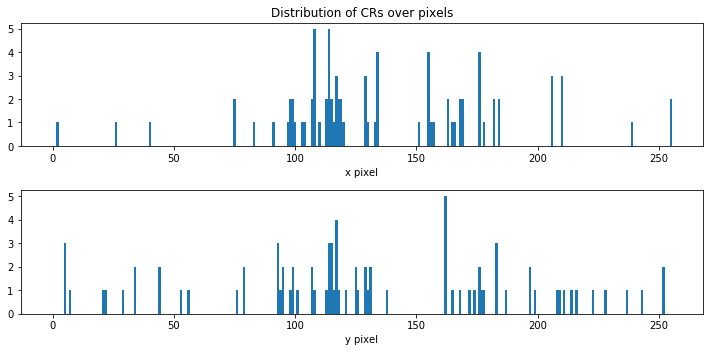

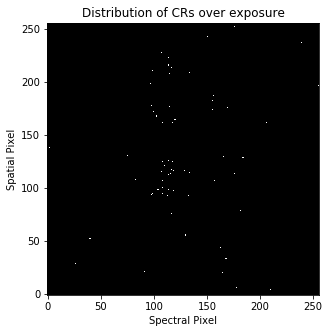

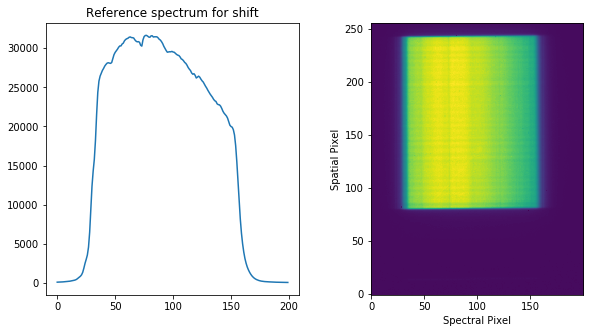

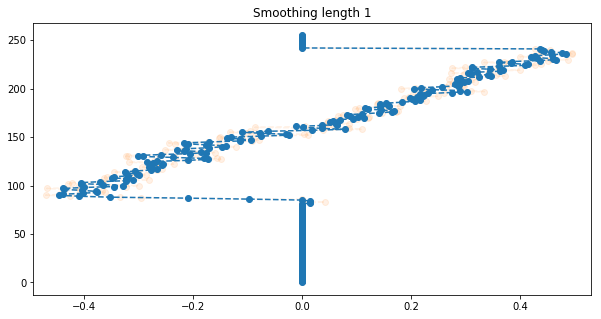

Saving reduced file to /home/jacob/hstscan/data/WASP-18/newtest_notsi_l1/
Saving reduced exposure to /home/jacob/hstscan/data/WASP-18/newtest_notsi_l1/ibh726meq_red.fits...
Reduction took 4.45s
########################################
###########Finished Reduction###########
########################################
########################################
###########Starting Extraction##########
########################################
Spectral extraction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see conf file: /home/jacob/hstscan/data/HD209458/GO12181/ext.conf
Extracting from subexposure 1
Extracting spectrum with a 80 high extraction box
Spectrum located at pixel 135.027022115 in spatial direction
Using flux for variance estimate
Extracting spectrum with optimal extraction...
200 successes out of 200 total fits
Optimal extraction fitting failed for columns: []
Clipped 0 cosmic rays in OE
200 200
Extracting from sube

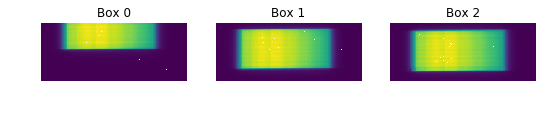

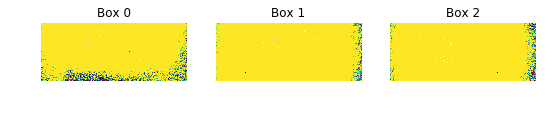

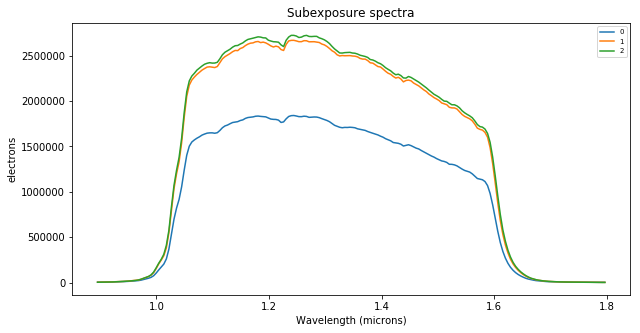

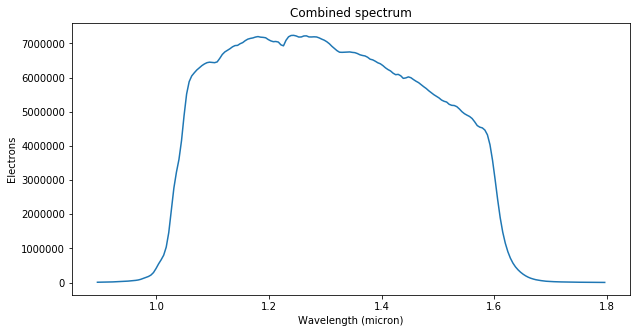

Extraction took 0.82s
########################################
###########Finished Extraction##########
########################################


In [38]:
fname = 'ibh726meq_ima.fits'
reload(pipe)
exp = pipe.reduce_exposure(fname, pdf=False, logger=False,
                           scan_rate=0.9, skip_start=1, remove_scan=False,
                           bg_x = 210, bg_y = 0, bg_w = 40, bg_h = 30,
                           tsiaras=False, exp_drift=True,
                           xshift_ext=-110,
                           conf_file='/home/jacob/hstscan/data/HD209458/GO12181/red.conf', \
                           source_dir='/home/jacob/hstscan/data/HD209458/GO12181/')

exp_spectrum, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, pdf=False, logger=False, box_h=80,
                    conf_file='/home/jacob/hstscan/data/HD209458/GO12181/ext.conf',
                    save_dir='')

# Compare Optimal Extractions

Check 

 - Do the subexposures agree, smoothly across the whole wavelength range?
 
 - How many optimal extraction fits fail near the peak of the spectrum?
 
 - Check the fits, are they overfitting or underfitting clearly? Safer to overfit.

In [2]:
fname = 'ibh726meq_ima.fits'
reload(pipe)
exp = pipe.reduce_exposure(fname, debug=False, logger=False,
                           scan_rate=0.9, skip_start=1, skip_end=1, remove_scan=False,
                           bg_x = 210, bg_y = 0, bg_w = 40, bg_h = 30,
                           tsiaras=False, exp_drift=True,
                           xshift_ext=-110,
                           conf_file='/home/jacob/hstscan/data/HD209458/GO12181/red.conf', \
                           source_dir='/home/jacob/hstscan/data/HD209458/GO12181/',
                           save_dir=None)

########################################
###########Starting Reduction###########
########################################
Data reduction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see pipeline conf file: /home/jacob/hstscan/data/HD209458/GO12181/red.conf
Forward scan
Catalogue used: /home/jacob/hstscan/data/HD209458/GO12181/ibh726mdq_flt_1.cat
Direct Image name: ibh726mdq
Catalogue file: ibh726mdq_ima.fits
Direct image location of (145.027022115,129.205914903)
External xshift of direct image applied, of -110 pix
applying postarg offset to yguess, 147.72 pix
applying postarg offset to yguess, 147.72 pix
/home/jacob/hstscan/src/WFC3.G141/WFC3.IR.G141.flat.2.fits


/home/jacob/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


/home/jacob/hstscan/src/WFC3.G141/WFC3.IR.G141.flat.2.fits
Removed 27 CR pixels from subexposure 1
Removed 38 CR pixels from subexposure 2
Reduction took 1.57s
########################################
###########Finished Reduction###########
########################################


########################################
###########Starting Extraction##########
########################################
Spectral extraction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see conf file: /home/jacob/hstscan/data/HD209458/GO12181/ext.conf
Extracting from subexposure 1
Extracting spectrum with a 80 high extraction box
Spectrum located at pixel 135.027022115 in spatial direction
Using flux for variance estimate
Extracting spectrum with optimal extraction...
199 successes out of 200 total fits
Optimal extraction fitting failed for columns: [198]
Clipped 0 cosmic rays in OE
200 200
Extracting from subexposure 2
Spectrum located at pixel 135.027022115 in spatial direction
Extracting spectrum with optimal extraction...
196 successes out of 200 total fits
Optimal extraction fitting failed for columns: [196, 199]
Clipped 0 cosmic rays in OE
200 200


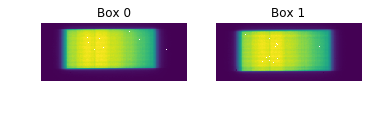

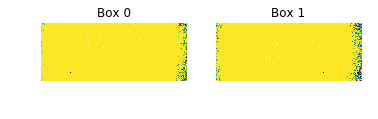

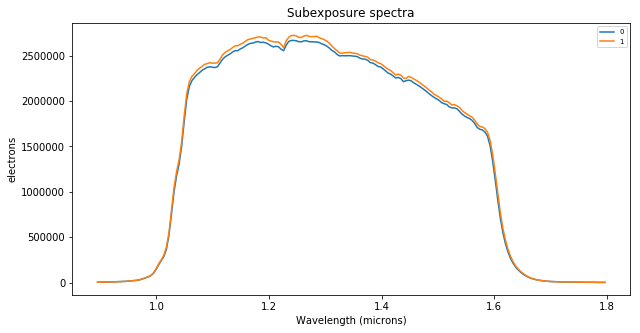

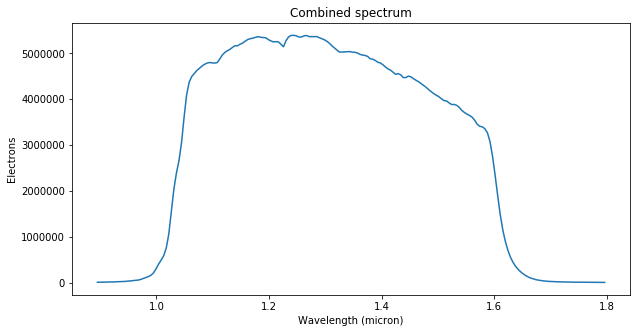

Extraction took 0.81s
########################################
###########Finished Extraction##########
########################################


In [3]:
# Default
exp_spectrum, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, pdf=False, logger=False, box_h=80,
                    oe_pdf=False,
                    conf_file='/home/jacob/hstscan/data/HD209458/GO12181/ext.conf',
                    save_dir=None)

########################################
###########Starting Extraction##########
########################################
Spectral extraction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see conf file: /home/jacob/hstscan/data/HD209458/GO12181/ext.conf
Extracting from subexposure 1
Extracting spectrum with a 80 high extraction box
Spectrum located at pixel 135.027022115 in spatial direction
Using flux for variance estimate
Extracting spectrum with optimal extraction...
199 successes out of 200 total fits
Optimal extraction fitting failed for columns: [198]
Clipped 0 cosmic rays in OE
200 200
Extracting from subexposure 2
Spectrum located at pixel 135.027022115 in spatial direction
Extracting spectrum with optimal extraction...


KeyboardInterrupt: 

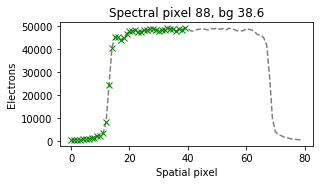

In [24]:
# Loose tolerance
exp_spectrum2, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, pdf=False, logger=False, box_h=80,
                    fit_tol = 1000, oe_pdf=False,
                    conf_file='/home/jacob/hstscan/data/HD209458/GO12181/ext.conf',
                    save_dir='./data/example/')
    
# Fit is poor, so when pixels are masked the flux is incorrectly re-scaled
# Leads to differences between subexposures and spikes in spectrum

In [26]:
# Tight tolerance
exp_spectrum3, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, pdf=False, logger=False, box_h=80,
                    fit_tol = 0.0001, oe_pdf=True,
                    conf_file='/home/jacob/hstscan/data/HD209458/GO12181/ext.conf',
                    save_dir='./data/example/')
    
# Beyond a certain point you are not really fitting but using the fluxes as weight
# Alternatively you may fail to find a fit

########################################
###########Starting Extraction##########
########################################
Spectral extraction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see conf file: /home/jacob/hstscan/data/HD209458/GO12181/ext.conf
Extracting from subexposure 1
Extracting spectrum with a 80 high extraction box
Spectrum located at pixel 135.027022115 in spatial direction
Using flux for variance estimate
Extracting spectrum with optimal extraction...
199 successes out of 200 total fits
Optimal extraction fitting failed for columns: [198]
Clipped 0 cosmic rays in OE
200 200
Extracting from subexposure 2
Spectrum located at pixel 135.027022115 in spatial direction
Extracting spectrum with optimal extraction...


KeyboardInterrupt: 

KeyboardInterrupt: 

########################################
###########Starting Extraction##########
########################################
Spectral extraction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see conf file: /home/jacob/hstscan/data/HD209458/GO12181/ext.conf
Extracting from subexposure 1
Extracting spectrum with a 80 high extraction box
Spectrum located at pixel 135.027022115 in spatial direction
Using flux for variance estimate
Extracting spectrum with optimal extraction...
199 successes out of 200 total fits
Optimal extraction fitting failed for columns: [198]
Clipped 0 cosmic rays in OE
200 200
Extracting from subexposure 2
Spectrum located at pixel 135.027022115 in spatial direction
Extracting spectrum with optimal extraction...
196 successes out of 200 total fits
Optimal extraction fitting failed for columns: [196, 199]
Clipped 0 cosmic rays in OE
200 200


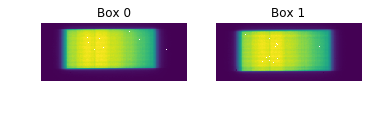

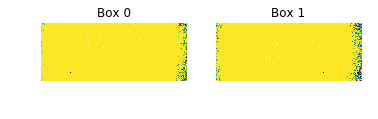

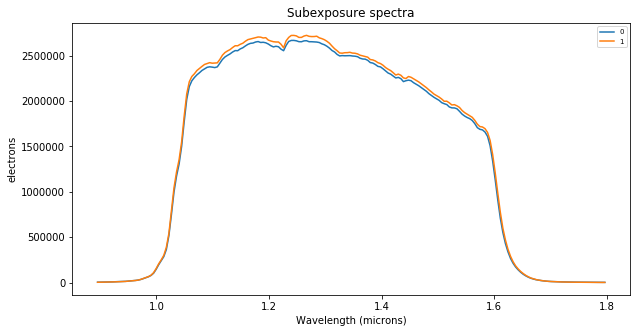

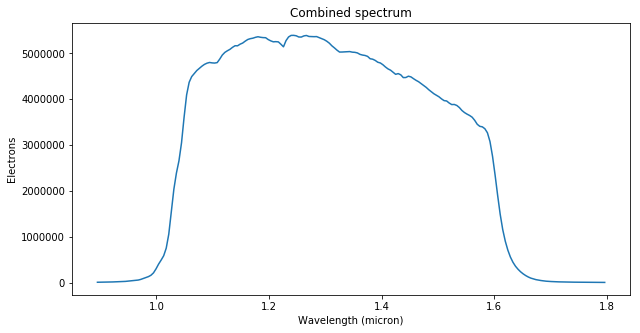

Saving spectrum to ./data/example/ibh726meq_spec.txt
Extraction took 0.55s
########################################
###########Finished Extraction##########
########################################


In [35]:
# Slightly looser tolerance
exp_spectrum4, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, pdf=False, logger=False, box_h=80,
                    fit_tol = 0.1, oe_pdf=False,
                    conf_file='/home/jacob/hstscan/data/HD209458/GO12181/ext.conf',
                    save_dir='./data/example/')
    
# Beyond a certain point you are not really fitting but using the fluxes as weight
# Alternatively you may fail to find a fit

########################################
###########Starting Extraction##########
########################################
Spectral extraction pipeline performed on exposure /home/jacob/hstscan/data/HD209458/GO12181/ibh726meq_ima.fits
For configuration, see conf file: /home/jacob/hstscan/data/HD209458/GO12181/ext.conf
Extracting from subexposure 1
Extracting spectrum with a 80 high extraction box
Spectrum located at pixel 135.027022115 in spatial direction
Using flux for variance estimate
Extracting spectrum with optimal extraction...
199 successes out of 200 total fits
Optimal extraction fitting failed for columns: [198]
Clipped 0 cosmic rays in OE
200 200
Extracting from subexposure 2
Spectrum located at pixel 135.027022115 in spatial direction
Extracting spectrum with optimal extraction...
196 successes out of 200 total fits
Optimal extraction fitting failed for columns: [196, 199]
Clipped 0 cosmic rays in OE
200 200


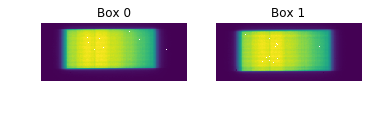

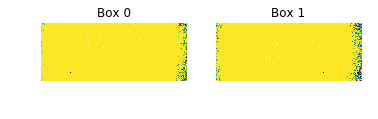

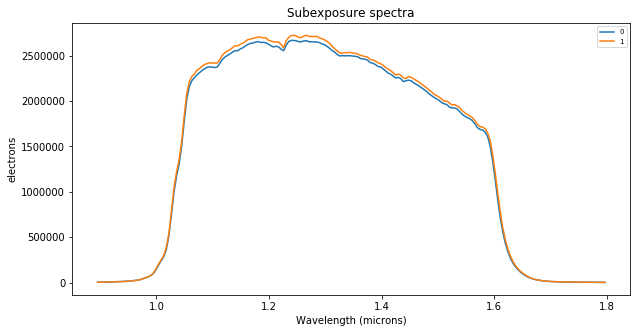

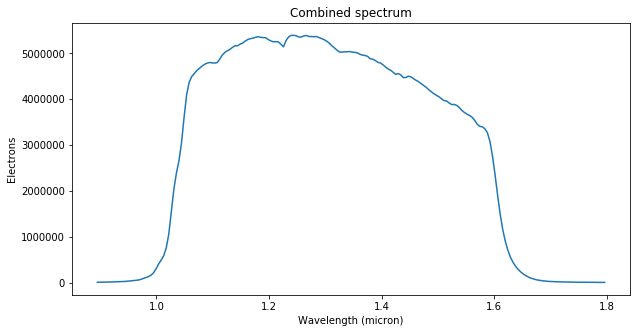

Saving spectrum to ./data/example/ibh726meq_spec.txt
Extraction took 0.57s
########################################
###########Finished Extraction##########
########################################


In [36]:
# Looser tolerance and second order
exp_spectrum5, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, pdf=False, logger=False, box_h=80,
                    fit_tol = 0.1, order=2, oe_pdf=False,
                    conf_file='/home/jacob/hstscan/data/HD209458/GO12181/ext.conf',
                    save_dir='./data/example/')
    
# Beyond a certain point you are not really fitting but using the fluxes as weight
# Alternatively you may fail to find a fit

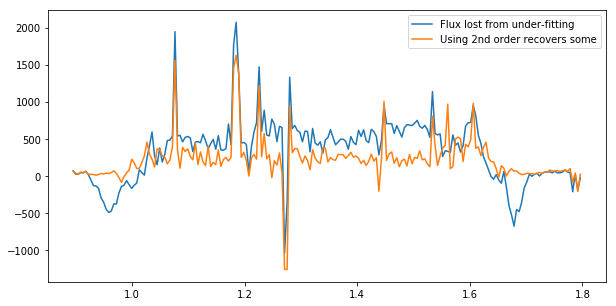

In [43]:
# 10-100 ppm effect on final spectra, can be significant for planet spectra
p.plot(exp_spectrum.x, (exp_spectrum.y-exp_spectrum4.y), label='Flux lost from under-fitting')
p.plot(exp_spectrum.x, (exp_spectrum.y-exp_spectrum5.y), label='Using 2nd order recovers some')
p.legend()
p.show()